# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

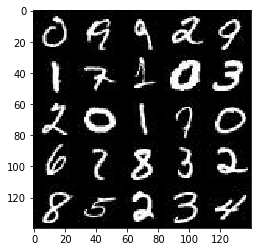

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

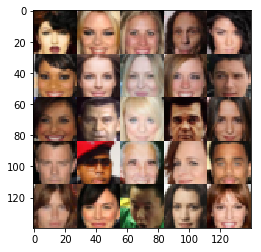

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='real_input')
    z_data = tf.placeholder(tf.float32, shape=(None, z_dim), name='z_data')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_input, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/carnd/anaconda3/envs/face/lib/python3.5/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/carnd/anaconda3/envs/face/lib/python3.5/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/carnd/anaconda3/envs/face/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/carnd/anaconda3/envs/face/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/carnd/anaconda3/envs/face/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/carnd/anacond

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [27]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 4, strides=2, padding="same", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.layers.dropout(x1, 0.8)

        x2 = tf.layers.conv2d(x1, 128, 4, strides=2, padding="same", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.dropout(x2, 0.8)

        x3 = tf.layers.conv2d(x2, 256, 4, strides=2, padding="same", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.dropout(x3, 0.8)

        x4 = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x4, 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [28]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*512)
        
        x1 = tf.reshape(x1, (-1,4,4,512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding="VALID", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding="SAME", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        x4 = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding="SAME", kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform=False))

        logits = x4
        output = tf.tanh(logits)

    return output
        
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [29]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    G = generator(input_z, out_channel_dim, is_train=True)
    D, D_logits = discriminator(input_real, reuse=False)
    
    D_, D_logits_ = discriminator(G, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logits, labels=tf.ones_like(D)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logits_, labels=tf.zeros_like(D_)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logits_, labels=tf.ones_like(D_)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    all_vars = tf.trainable_variables()
    g_vars = [var for var in all_vars if var.name.startswith('generator')]
    d_vars = [var for var in all_vars if var.name.startswith('discriminator')]
    #with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    update_g_vars = [var for var in update_ops if var.name.startswith('generator')]
    update_d_vars = [var for var in update_ops if var.name.startswith('discriminator')]
    with tf.control_dependencies(update_d_vars):
        d_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(update_g_vars):    
        g_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [32]:
import time
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    real_input, z_data, learning_rate1 = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(real_input, z_data, data_shape[-1])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    counter = 1
    start_time = time.time()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, [batch_size, z_dim]).astype(np.float32)
                sess.run(d_opt, feed_dict={real_input:batch_images, z_data:batch_z, learning_rate1:learning_rate})
                sess.run(g_opt, feed_dict={z_data:batch_z, learning_rate1:learning_rate})
                errD = d_loss.eval({z_data:batch_z, real_input:batch_images})
                errG = g_loss.eval({z_data:batch_z})
                
                counter += 1
                if np.mod(counter, 50) == 1:
                    print("Epoch: %2d, time: %4.4f, d_loss: %.8f, g_loss: %.8f" % (epoch_i, time.time() - start_time, errD, errG))
                if np.mod(counter, 100) == 1:
                    show_generator_output(sess, 25, z_data, data_shape[3], data_image_mode)
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch:  0, time: 14.1806, d_loss: 0.78097153, g_loss: 1.63153291
Epoch:  0, time: 25.7009, d_loss: 1.26690245, g_loss: 2.36687088


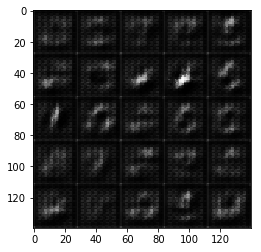

Epoch:  0, time: 37.8356, d_loss: 1.21129262, g_loss: 0.75189400
Epoch:  0, time: 51.3693, d_loss: 1.46984994, g_loss: 0.50336647


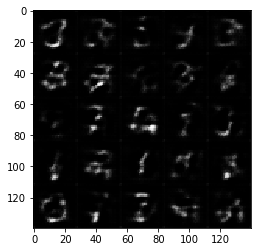

Epoch:  0, time: 66.1795, d_loss: 1.53275359, g_loss: 2.17811203
Epoch:  0, time: 80.3706, d_loss: 1.28683150, g_loss: 1.13527083


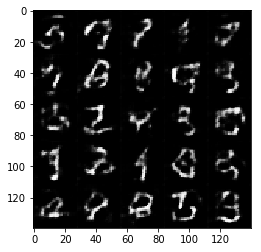

Epoch:  0, time: 94.6635, d_loss: 1.15865397, g_loss: 0.79608589
Epoch:  0, time: 108.8822, d_loss: 1.40523326, g_loss: 0.53531790


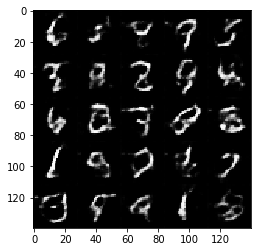

Epoch:  0, time: 123.7793, d_loss: 1.26469290, g_loss: 0.69664037
Epoch:  0, time: 139.3098, d_loss: 1.19702625, g_loss: 0.68112409


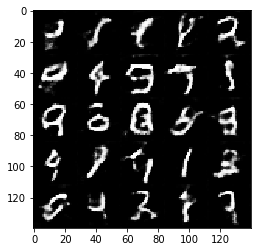

Epoch:  0, time: 153.7961, d_loss: 1.10312819, g_loss: 0.91497314
Epoch:  0, time: 167.7642, d_loss: 1.23019171, g_loss: 0.71860075


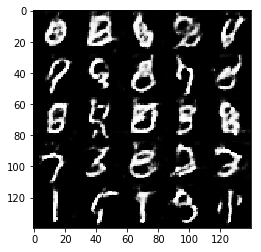

Epoch:  0, time: 182.2503, d_loss: 1.32927167, g_loss: 0.62466842
Epoch:  0, time: 196.6030, d_loss: 1.00008273, g_loss: 1.20254683


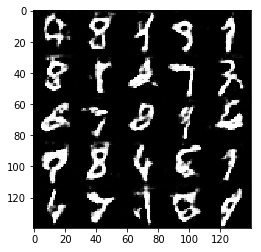

Epoch:  0, time: 212.2124, d_loss: 1.04184759, g_loss: 1.43343472
Epoch:  0, time: 225.9960, d_loss: 1.25100780, g_loss: 0.59201288


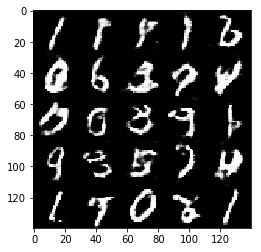

Epoch:  0, time: 240.1155, d_loss: 1.46724081, g_loss: 0.44319582
Epoch:  0, time: 253.9249, d_loss: 0.92328203, g_loss: 1.02087641


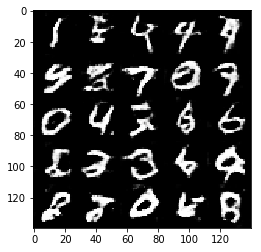

Epoch:  1, time: 269.6281, d_loss: 1.02850938, g_loss: 0.83156550
Epoch:  1, time: 281.1184, d_loss: 1.26906669, g_loss: 0.58799702


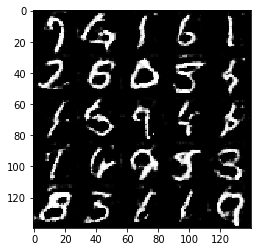

Epoch:  1, time: 293.2156, d_loss: 0.93307233, g_loss: 0.99975330
Epoch:  1, time: 304.7381, d_loss: 0.83716941, g_loss: 1.10396290


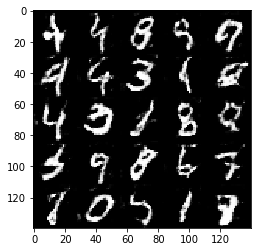

Epoch:  1, time: 316.8423, d_loss: 0.93405318, g_loss: 0.97449106
Epoch:  1, time: 328.3521, d_loss: 1.18602550, g_loss: 0.74735487


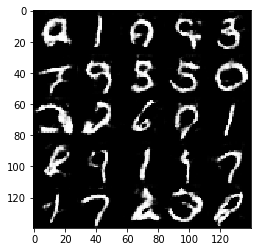

Epoch:  1, time: 340.4565, d_loss: 0.58989751, g_loss: 1.74753129
Epoch:  1, time: 351.9612, d_loss: 0.58235407, g_loss: 1.82827675


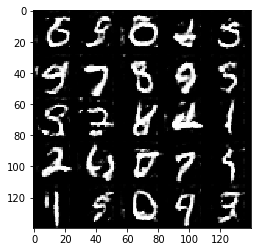

Epoch:  1, time: 364.0288, d_loss: 0.78369707, g_loss: 2.18297243
Epoch:  1, time: 375.5538, d_loss: 0.78327072, g_loss: 1.94578600


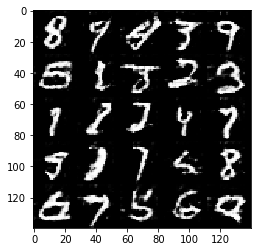

Epoch:  1, time: 387.6180, d_loss: 0.71228898, g_loss: 1.75128877
Epoch:  1, time: 399.0635, d_loss: 1.46803486, g_loss: 0.45258382


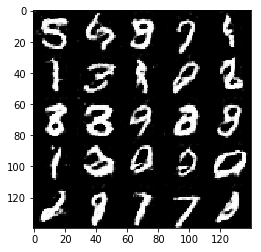

Epoch:  1, time: 411.1644, d_loss: 0.84728974, g_loss: 1.05500376
Epoch:  1, time: 422.6263, d_loss: 1.07060707, g_loss: 0.78144610


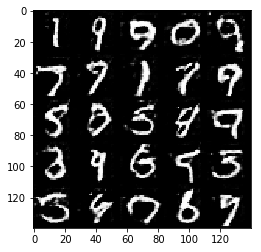

Epoch:  1, time: 434.7365, d_loss: 1.10547149, g_loss: 0.81548548
Epoch:  1, time: 446.2124, d_loss: 0.66280806, g_loss: 1.49333358


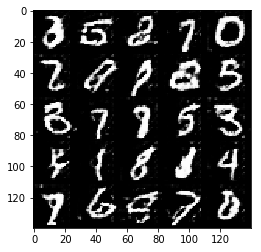

Epoch:  1, time: 458.3441, d_loss: 0.74323851, g_loss: 1.64618158
Epoch:  1, time: 469.8832, d_loss: 0.66365111, g_loss: 1.45410538


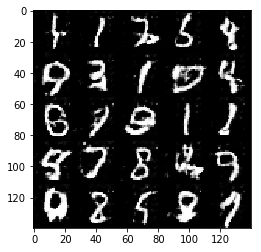

Epoch:  1, time: 482.0038, d_loss: 1.55119598, g_loss: 3.88273859


In [33]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch:  0, time: 14.7232, d_loss: 0.92608213, g_loss: 11.14496708
Epoch:  0, time: 25.9186, d_loss: 0.56905675, g_loss: 6.10837078


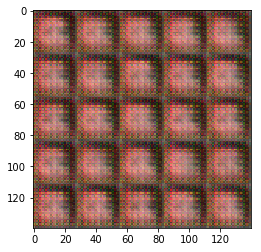

Epoch:  0, time: 37.6244, d_loss: 0.57330692, g_loss: 2.07730508
Epoch:  0, time: 48.8406, d_loss: 0.45162949, g_loss: 2.85517216


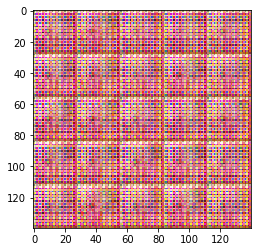

Epoch:  0, time: 60.6038, d_loss: 0.61929142, g_loss: 1.88279772
Epoch:  0, time: 71.6134, d_loss: 1.73375583, g_loss: 0.38663262


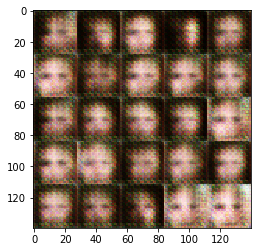

Epoch:  0, time: 83.4503, d_loss: 1.21558559, g_loss: 1.93263865
Epoch:  0, time: 94.4652, d_loss: 1.31013143, g_loss: 0.79203963


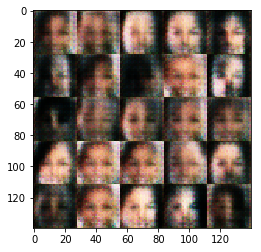

Epoch:  0, time: 106.1317, d_loss: 1.28203750, g_loss: 0.83400631
Epoch:  0, time: 117.3504, d_loss: 1.61619091, g_loss: 0.42124954


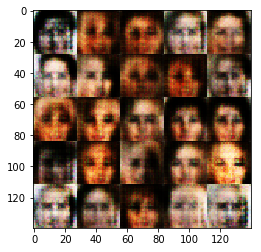

Epoch:  0, time: 129.5256, d_loss: 1.23232579, g_loss: 0.79987681
Epoch:  0, time: 140.8245, d_loss: 1.43113017, g_loss: 0.62437248


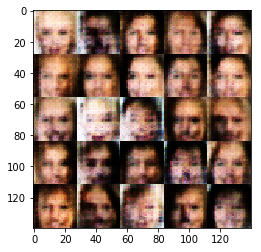

Epoch:  0, time: 152.8765, d_loss: 1.14074588, g_loss: 1.13273573
Epoch:  0, time: 163.9366, d_loss: 1.35600471, g_loss: 0.57322997


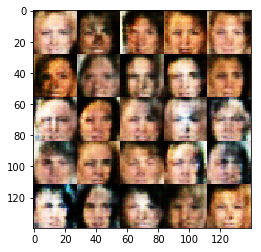

Epoch:  0, time: 175.5461, d_loss: 1.12623024, g_loss: 1.24042428
Epoch:  0, time: 186.7744, d_loss: 1.78547502, g_loss: 1.90352523


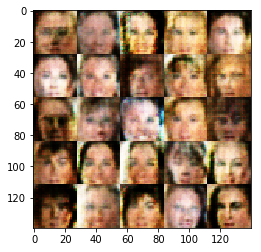

Epoch:  0, time: 198.5246, d_loss: 1.30563486, g_loss: 0.62042296
Epoch:  0, time: 209.8151, d_loss: 1.30890679, g_loss: 0.63734806


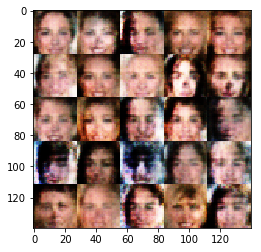

Epoch:  0, time: 221.4009, d_loss: 1.32222378, g_loss: 1.32796955
Epoch:  0, time: 232.3838, d_loss: 1.33968067, g_loss: 1.41631174


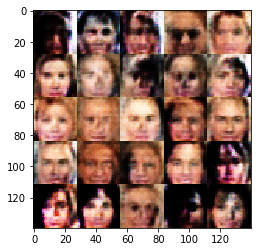

Epoch:  0, time: 244.3728, d_loss: 1.39837337, g_loss: 0.51811588
Epoch:  0, time: 255.4974, d_loss: 1.42351925, g_loss: 0.56043351


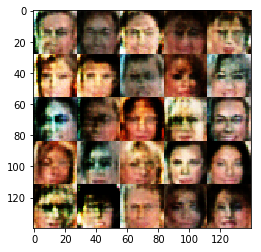

Epoch:  0, time: 267.1744, d_loss: 1.31354558, g_loss: 0.56462657
Epoch:  0, time: 278.3915, d_loss: 0.86970919, g_loss: 1.00856566


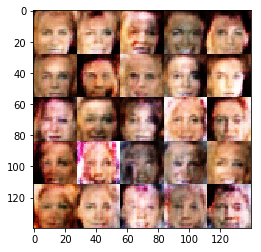

Epoch:  0, time: 290.1948, d_loss: 1.14816833, g_loss: 1.94939876
Epoch:  0, time: 301.6530, d_loss: 0.92727154, g_loss: 0.93955690


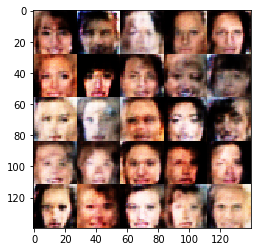

Epoch:  0, time: 313.2362, d_loss: 1.30349708, g_loss: 0.54515696
Epoch:  0, time: 324.3170, d_loss: 1.20429373, g_loss: 0.59514523


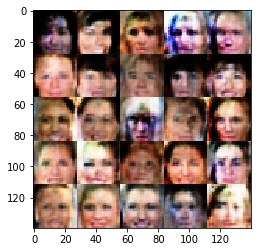

Epoch:  0, time: 336.1104, d_loss: 1.08684945, g_loss: 0.69432330
Epoch:  0, time: 347.1137, d_loss: 1.10742378, g_loss: 1.09641051


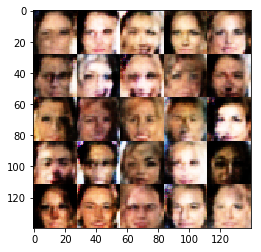

Epoch:  0, time: 358.6196, d_loss: 2.10686278, g_loss: 3.29429317
Epoch:  0, time: 369.7301, d_loss: 0.98324072, g_loss: 0.84528005


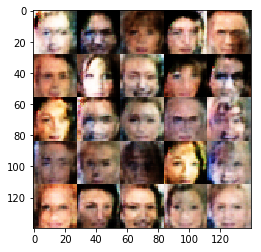

Epoch:  0, time: 381.5920, d_loss: 0.93529987, g_loss: 2.43228626
Epoch:  0, time: 392.6701, d_loss: 1.57860827, g_loss: 3.25686359


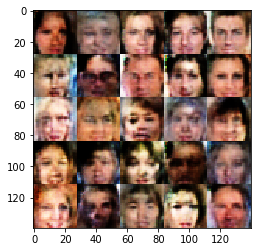

Epoch:  0, time: 404.4616, d_loss: 0.98494118, g_loss: 2.37298965
Epoch:  0, time: 415.7560, d_loss: 1.23349261, g_loss: 0.59007323


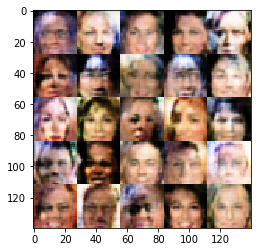

Epoch:  0, time: 427.4334, d_loss: 1.71996188, g_loss: 0.36424410
Epoch:  0, time: 438.3667, d_loss: 0.75040090, g_loss: 2.01810598


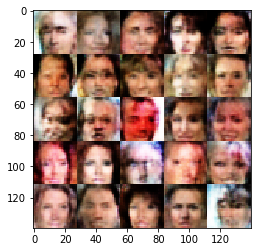

Epoch:  0, time: 450.7539, d_loss: 1.48684454, g_loss: 0.49504834
Epoch:  0, time: 461.5771, d_loss: 0.93179417, g_loss: 2.47039890


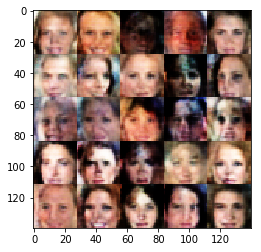

Epoch:  0, time: 473.3107, d_loss: 0.68616652, g_loss: 1.35490501
Epoch:  0, time: 484.6042, d_loss: 1.12686276, g_loss: 0.71219218


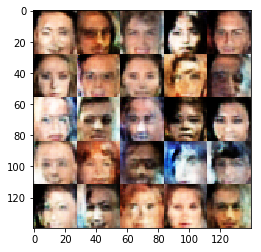

Epoch:  0, time: 496.5477, d_loss: 1.39326668, g_loss: 0.47652900
Epoch:  0, time: 507.8638, d_loss: 0.88292420, g_loss: 1.10817719


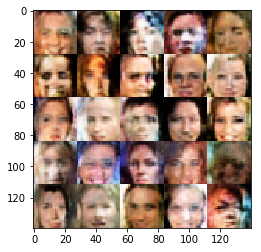

Epoch:  0, time: 519.9241, d_loss: 0.84270298, g_loss: 1.17633212
Epoch:  0, time: 531.3572, d_loss: 0.81997275, g_loss: 1.84754527


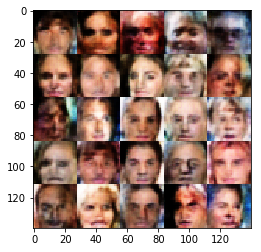

Epoch:  0, time: 543.1196, d_loss: 0.80720419, g_loss: 2.82268476
Epoch:  0, time: 554.7000, d_loss: 0.82640797, g_loss: 1.06492496


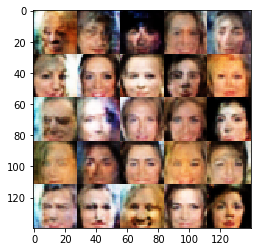

Epoch:  0, time: 566.4038, d_loss: 0.64992613, g_loss: 1.64591146
Epoch:  0, time: 577.5322, d_loss: 0.54476750, g_loss: 2.11752486


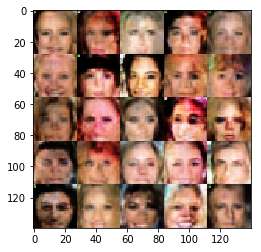

Epoch:  0, time: 589.4501, d_loss: 0.66427481, g_loss: 1.77679729
Epoch:  0, time: 600.4991, d_loss: 1.12793279, g_loss: 0.70206392


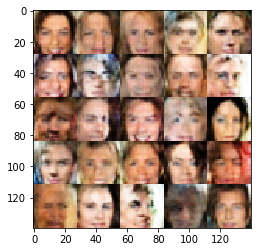

Epoch:  0, time: 612.5006, d_loss: 0.64123762, g_loss: 1.60106027
Epoch:  0, time: 624.0411, d_loss: 0.55917257, g_loss: 2.03855276


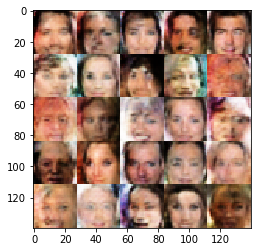

Epoch:  0, time: 636.1934, d_loss: 1.11518753, g_loss: 2.57335186
Epoch:  0, time: 647.7456, d_loss: 0.57658267, g_loss: 1.85253704


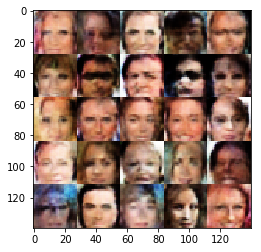

Epoch:  0, time: 659.7711, d_loss: 0.85726851, g_loss: 1.12349665
Epoch:  0, time: 671.1941, d_loss: 0.62583339, g_loss: 2.14522266


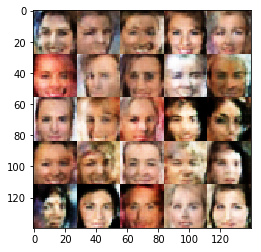

Epoch:  0, time: 683.5866, d_loss: 0.78322119, g_loss: 1.35334074
Epoch:  0, time: 694.9616, d_loss: 1.42695498, g_loss: 0.53256190


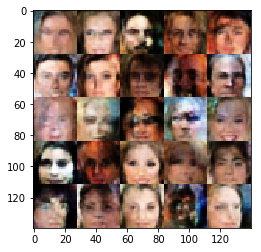

Epoch:  0, time: 707.0295, d_loss: 0.86970049, g_loss: 3.87213874
Epoch:  0, time: 718.7817, d_loss: 2.20170140, g_loss: 0.22208963


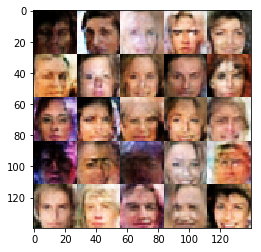

Epoch:  0, time: 730.8913, d_loss: 0.55881065, g_loss: 2.63306904
Epoch:  0, time: 742.4987, d_loss: 0.96007252, g_loss: 2.85481620


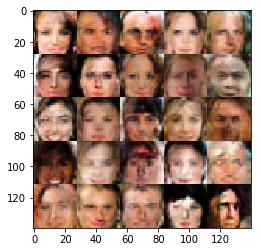

Epoch:  0, time: 755.2199, d_loss: 1.82507026, g_loss: 0.39994085
Epoch:  0, time: 766.7992, d_loss: 0.62058794, g_loss: 1.67883205


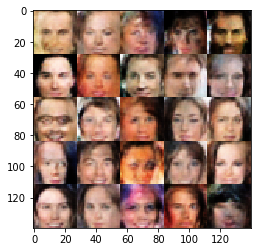

Epoch:  0, time: 779.1909, d_loss: 0.81600463, g_loss: 1.62367570
Epoch:  0, time: 790.7764, d_loss: 0.60500234, g_loss: 2.38146400


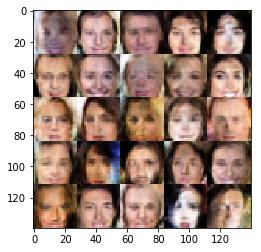

Epoch:  0, time: 802.9999, d_loss: 0.86730945, g_loss: 1.02595925
Epoch:  0, time: 814.9213, d_loss: 0.65613854, g_loss: 2.19301176


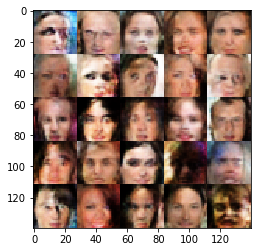

Epoch:  0, time: 827.8496, d_loss: 0.92967618, g_loss: 2.19139624
Epoch:  0, time: 839.3381, d_loss: 0.60481852, g_loss: 3.10929918


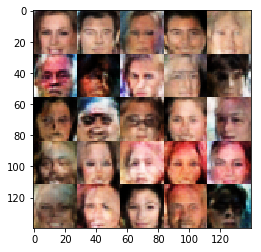

Epoch:  0, time: 850.9460, d_loss: 0.42414096, g_loss: 3.25247693
Epoch:  0, time: 862.5763, d_loss: 1.32937312, g_loss: 0.58431041


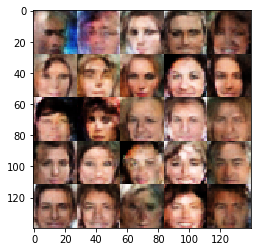

Epoch:  0, time: 874.5779, d_loss: 0.47664043, g_loss: 2.30033565
Epoch:  0, time: 886.0543, d_loss: 1.25861156, g_loss: 0.63868463


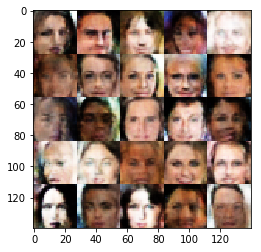

Epoch:  0, time: 898.4105, d_loss: 0.52132243, g_loss: 2.13725758
Epoch:  0, time: 910.4566, d_loss: 0.59553665, g_loss: 1.66739011


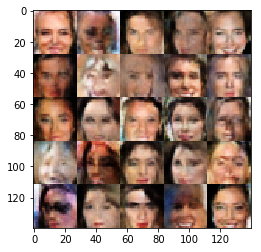

Epoch:  0, time: 922.7056, d_loss: 0.90856582, g_loss: 1.05716002
Epoch:  0, time: 933.8664, d_loss: 0.71579564, g_loss: 2.60842752


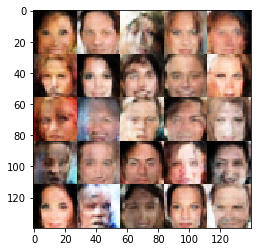

Epoch:  0, time: 945.6483, d_loss: 0.75927848, g_loss: 1.26870513
Epoch:  0, time: 956.9718, d_loss: 0.51810408, g_loss: 2.07018280


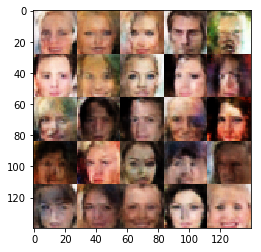

Epoch:  0, time: 969.3364, d_loss: 0.78627521, g_loss: 1.78671217
Epoch:  0, time: 981.1909, d_loss: 1.13039052, g_loss: 0.78287518


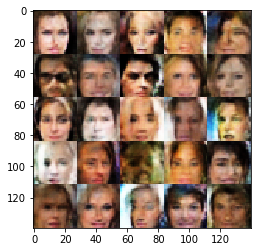

Epoch:  0, time: 992.9268, d_loss: 1.77925682, g_loss: 0.32558054
Epoch:  0, time: 1004.1019, d_loss: 0.67483556, g_loss: 1.60056484


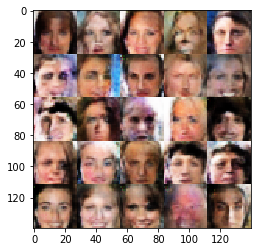

Epoch:  0, time: 1015.9051, d_loss: 0.71926433, g_loss: 3.26989818
Epoch:  0, time: 1027.1924, d_loss: 0.38165322, g_loss: 3.98522949


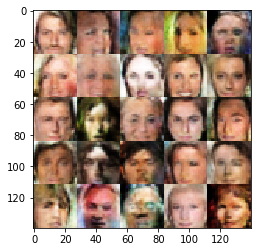

Epoch:  0, time: 1039.1399, d_loss: 1.08790779, g_loss: 0.77234221
Epoch:  0, time: 1050.5011, d_loss: 0.51913053, g_loss: 2.28942966


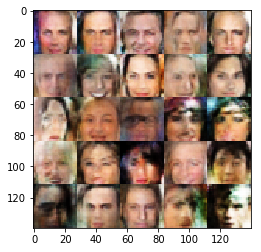

Epoch:  0, time: 1062.9327, d_loss: 1.12316346, g_loss: 0.75081587
Epoch:  0, time: 1073.9547, d_loss: 0.98060405, g_loss: 0.85209715


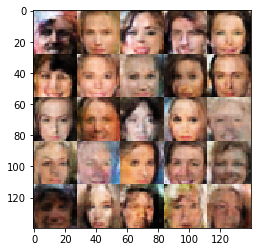

Epoch:  0, time: 1086.1310, d_loss: 0.44322419, g_loss: 2.57600546
Epoch:  0, time: 1097.5169, d_loss: 1.05523646, g_loss: 0.92740846


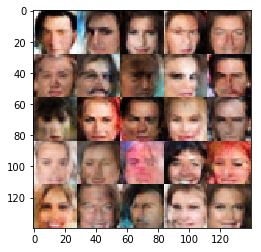

Epoch:  0, time: 1109.5992, d_loss: 0.59748650, g_loss: 2.83922195
Epoch:  0, time: 1120.8495, d_loss: 0.69400179, g_loss: 1.59700274


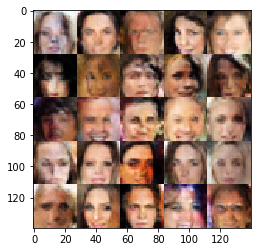

Epoch:  0, time: 1133.4209, d_loss: 1.19764721, g_loss: 0.72406101
Epoch:  0, time: 1144.3995, d_loss: 0.42016983, g_loss: 2.96501660


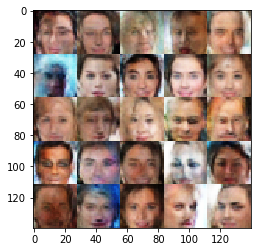

Epoch:  0, time: 1156.0482, d_loss: 0.80980825, g_loss: 1.21426642
Epoch:  0, time: 1167.3077, d_loss: 0.49722379, g_loss: 2.66292310


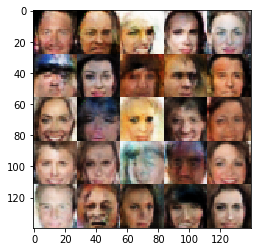

Epoch:  0, time: 1179.1026, d_loss: 0.69884253, g_loss: 2.57664680
Epoch:  0, time: 1190.2805, d_loss: 0.86386335, g_loss: 1.13566685


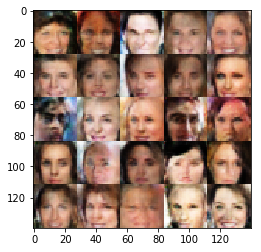

Epoch:  0, time: 1203.5220, d_loss: 0.69289649, g_loss: 1.49206853
Epoch:  0, time: 1214.5897, d_loss: 0.51120484, g_loss: 2.15385604


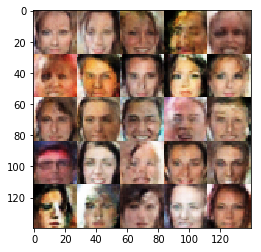

Epoch:  0, time: 1226.5913, d_loss: 1.83681321, g_loss: 0.43155977
Epoch:  0, time: 1238.1960, d_loss: 0.61833382, g_loss: 1.62472272


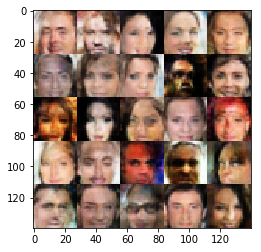

Epoch:  0, time: 1250.7916, d_loss: 1.04297185, g_loss: 0.82790071
Epoch:  0, time: 1261.8699, d_loss: 0.92601800, g_loss: 1.02687550


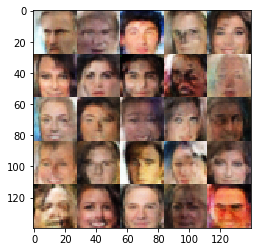

Epoch:  0, time: 1274.0181, d_loss: 0.88780349, g_loss: 1.04348445
Epoch:  0, time: 1285.5850, d_loss: 0.87786239, g_loss: 2.41085529


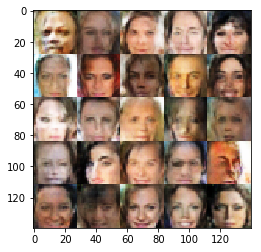

Epoch:  0, time: 1297.2935, d_loss: 0.63781703, g_loss: 1.68797612
Epoch:  0, time: 1308.3516, d_loss: 0.67842615, g_loss: 1.91370320


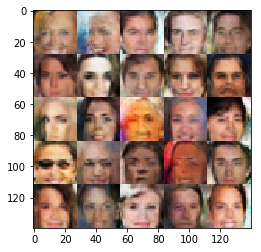

Epoch:  0, time: 1320.3734, d_loss: 0.77045608, g_loss: 1.29746723
Epoch:  0, time: 1331.3898, d_loss: 0.55006772, g_loss: 1.95354438


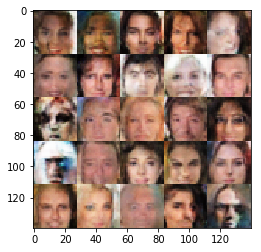

Epoch:  0, time: 1343.1746, d_loss: 0.59347618, g_loss: 1.68907189
Epoch:  0, time: 1355.0242, d_loss: 0.46758384, g_loss: 3.92745209


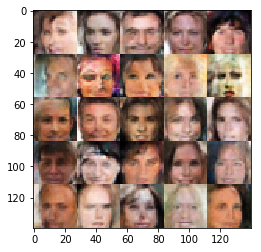

Epoch:  0, time: 1366.5943, d_loss: 1.19532204, g_loss: 0.75422752
Epoch:  0, time: 1377.7244, d_loss: 0.52249217, g_loss: 2.12993813


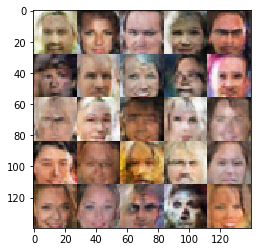

Epoch:  0, time: 1390.3880, d_loss: 0.46404415, g_loss: 2.69006371
Epoch:  0, time: 1401.5942, d_loss: 0.42043379, g_loss: 2.91073895


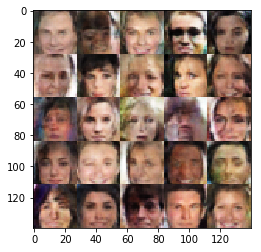

Epoch:  0, time: 1413.1857, d_loss: 1.80712771, g_loss: 4.98922443
Epoch:  0, time: 1425.3018, d_loss: 0.62383318, g_loss: 1.69114065


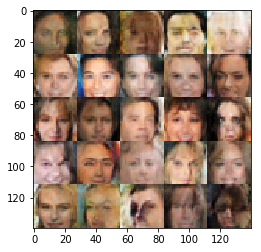

Epoch:  0, time: 1437.1117, d_loss: 0.94378364, g_loss: 0.95303905
Epoch:  0, time: 1447.6900, d_loss: 0.46661833, g_loss: 2.42557597


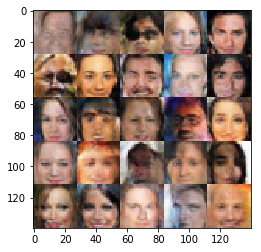

Epoch:  0, time: 1459.4053, d_loss: 0.45567906, g_loss: 3.21591806
Epoch:  0, time: 1470.6767, d_loss: 0.79010701, g_loss: 1.27549815


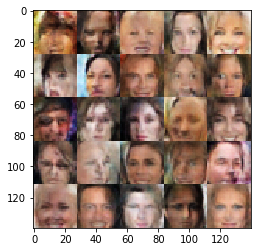

In [34]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。